### **A Comparative Analysis of Public Sentiment on Twitter towards Apple and Google Products using Natural Language Processing.**  


**Group Name: Group 5**

**Members**
1. *Rose Miriti*
2. *Isaac Wadhare*
3. *Lydia Chumba*
4. *Erick Mauti*
5. *Marilyn Akinyi*
6. *Rodgers Otieno*
7. *Samwel Ongechi*

**Technical Mentor: George Kamundia**

**Phase: Phase 4 Project**


# Sentiment Analysis of Tweets on Apple and Google Products

##  Summary

This project focuses on analyzing public sentiment expressed on Twitter regarding Apple and Google products, using a labeled dataset of over 9,000 tweets categorized as positive, negative, or neutral. The goal is to build a proof-of-concept NLP model capable of classifying tweets according to sentiment, providing actionable insights that can guide business strategy, marketing, and product development for the two companies.

The workflow begins with **business and data understanding**, where the problem is defined, the dataset is explored, and the distribution of sentiment classes is analyzed. The **data preparation** stage includes text cleaning, tokenization, stopword removal, and lemmatization and stemming. Text data will then be transformed into numerical representations using TF-IDF vectors or word embeddings, creating features suitable for machine learning models.

For **modeling**, baseline models such as Logistic Regression and Naive Bayes will be implemented first to establish performance benchmarks. For advanced modeling, we will implement a **neural network**. We will also employ Ensemble methods like Random Forest and Gradient Boosting (XGBoost). 

A **validation strategy** using stratified train-test splits and K-Fold cross-validation will ensure the models generalize well to unseen data. **Evaluation metrics** will include accuracy, precision, recall, F1-score, and confusion matrices to assess multiclass classification performance. The project will produce insights into public sentiment trends, which will directly inform recommendations answering key objectives regarding customer perception, sentiment drivers, and business strategies.


## Business Problem

Apple and Google face continuous public scrutiny on social media regarding product launches and services. Understanding real-time customer sentiment is critical to improve products, marketing strategies, and customer satisfaction.  

**Business problem:**  
*"Can we automatically classify the sentiment of tweets about Apple and Google products to support actionable business insights?"*


## Project Objectives

1. **Determine the overall public sentiment** towards Apple and Google products on Twitter.  
2. **Identify tweet characteristics and themes** that contribute to positive, negative, or neutral sentiment.  
3. **Provide actionable insights** from sentiment trends to inform business decisions, marketing strategies, and product improvements.  

## 1.0 Importing the necessary libraries for the analysis

In [25]:
# Import essential libraries
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji
import string
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Import NLTK specific modules
from nltk.corpus import stopwords, gutenberg
import contractions
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import FreqDist, bigrams, trigrams, ngrams
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk import CFG, ChartParser
from nltk import pos_tag
from wordcloud import WordCloud


# Import scikit-learn for machine learning
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import time


# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("All libraries imported successfully!")
print("Environment setup complete!")

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

All libraries imported successfully!
Environment setup complete!


## 1.1 Loading the dataset
- Loading the data into a pandas DataFrame and view the first 5 records.

In [26]:
df = pd.read_csv('Data\judge-1377884607_tweet_product_company.csv', encoding = 'latin-1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## 1.2 Data Inspecting 
- Data structure


In [27]:
print("Data Structure")
print(f"Shape: {df.shape} \n")
print(f'{df.info()} \n')  
print("OBSERVATION:")
print(f"There are {df.shape[1]} features. " )
print(f"And {df.shape[0]} records in our dataset." )
print("All features are categorical.")
print("There are missing values in two columns: 'tweet_text' and 'emotion_in_tweet_is_directed_at'.")

Data Structure
Shape: (9093, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None 

OBSERVATION:
There are 3 features. 
And 9093 records in our dataset.
All features are categorical.
There are missing values in two columns: 'tweet_text' and 'emotion_in_tweet_is_directed_at'.


In [28]:
print((df.isnull().sum()/len(df))*100)

tweet_text                                             0.010997
emotion_in_tweet_is_directed_at                       63.807324
is_there_an_emotion_directed_at_a_brand_or_product     0.000000
dtype: float64


### Observation
- **Missing Values**:  
  - `tweet_text`: 0.01%  
  - `emotion_in_tweet_is_directed_at`: 63.8% missing values.  
  - Target column has **no missing values**. 

In [29]:
# Checking for duplicates
print(f"There are {df.duplicated().sum()} duplicates in our dataset. \nWe need to drop them to prevent false outcome .")

There are 22 duplicates in our dataset. 
We need to drop them to prevent false outcome .


- Check uniques values for sentiment features and their frequency

In [30]:
print(f"{df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()} \n")

print("Observation:")
print("There is need to merge neutral sentiments and remove the word 'emotion' from positive and negative sentiments")
print("Neutral emotions holds more than 50% of the dataset")


is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64 

Observation:
There is need to merge neutral sentiments and remove the word 'emotion' from positive and negative sentiments
Neutral emotions holds more than 50% of the dataset


## 2.0 Data Cleaning
**Involves 3 stages:**

### 2.1 Stage 1:
Involves:
- **Column Standardization** - Shortening names for easy reference 
- **Removing duplicates**- Preventing duplicate samples from overweighting certain classes hence every unique tweet target pair appears only once.
- **Mapping sentiment unique values**- Consolidates the neutral emotions and remove emotions from the other parameter

- For this project, we simplify the dataset into three main sentiment classes: 
**positive, negative, and neutral.**  
- **"Positive emotion": Positive**  
- **"Negative emotion" : Negative**  
- **"I can't tell" : Neutral**  
  This reflects uncertainty. It is not clear whether the sentiment is  positive or 
  negative. Mapping it to *neutral* ensures 
  the model doesn’t misinterpret it as an opinion.

- **"No emotion toward brand or product": Neutral**  
  This explicitly signals the absence of any emotional reaction hence it fits best under *neutral*.

In [31]:
# Column Standardization
df = df.rename(columns= {'tweet_text':'text','emotion_in_tweet_is_directed_at':'brand',
                         'is_there_an_emotion_directed_at_a_brand_or_product':'sentiment'})


#Removing duplicates
df = df.drop_duplicates()

#Mapping sentiment unique values
sentiment_mapping = {
    'Negative emotion': 'Negative', 
    'Positive emotion':'Positive',
    'No emotion toward brand or product': 'Neutral',
    "I can't tell":'Neutral'
}
df['sentiment'] = df['sentiment'].map(sentiment_mapping)

### 2.2 Stage 2:
- **Handling missing values**
- Use a dictionary to populate either Apple or Google in all instances where the tweet contains the product names in the list<br>
Index will be used as keys in the dictionary for the sake of matching it with the tweet index later for appropriate categorization<br>
- Replacing null on the brand column with 'Unknown' for the remaining dataset. And dropping null values on the 'text' column the remaining null values

In [32]:
# Dropping null for text column
df = df.dropna(subset=['text'])

# Your brand lists (converted to lowercase for case-insensitive matching)
google_products = [product.lower() for product in [
    "google", "gmail", "gdrive", "google drive", "gdocs", "google docs",
    "gsheets", "google sheets", "gslides", "google slides", "gmeet", "google meet",
    "google calendar", "chrome", "chromebook", "chromecast", "chromium",
    "pixel", "pixelbook", "nest", "google home", "android", "wear os", "play store",
    "google maps", "google earth", "waze", "google photos", "youtube", "yt music",
    "google cloud", "gcp", "google workspace", "google ads", "adsense", "doubleclick"
]]

apple_products = [product.lower() for product in [
    "apple", "icloud", "itunes", "apple music", "apple tv", "apple tv", "apple arcade",
    "apple pay", "apple news", "apple podcasts", "apple watch", "watchos",
    "iphone", "ipad", "ipados", "imac", "macbook", "macbook air", "macbook pro",
    "mac mini", "mac pro", "airpods", "airpods pro", "airpods max",
    "safari", "siri", "facetime", "imessage", "keynote", "numbers", "pages",
    "app store", "ios", "macos", "homepod", "find my", "testflight", "xcode", "iwatch", "mac","macpro"
]]

# Function to identify brand from text
def identify_brand_from_text(text):
    """
    Identify if text contains words related to Google or Apple products.
    Returns 'Apple', 'Google', or 'Unknown'.
    """
    if not isinstance(text, str) or pd.isna(text):
        return 'Unknown'
    
    text_lower = text.lower()
    
    # Check for Apple products
    for product in apple_products:
        if re.search(r'\b' + re.escape(product) + r'\b', text_lower):
            return 'Apple'
    
    # Check for Google products
    for product in google_products:
        if re.search(r'\b' + re.escape(product) + r'\b', text_lower):
            return 'Google'
    
    return 'Unknown'

# Check current brand distribution before imputation
print("Brand distribution BEFORE imputation:")
print(df['brand'].value_counts(dropna=False))
print(f"Missing brands: {df['brand'].isna().sum()}")

# Only impute brands for rows where brand is missing
mask = df['brand'].isna()
df.loc[mask, 'brand'] = df.loc[mask, 'text'].apply(identify_brand_from_text)

# Check brand distribution after imputation
print("\nBrand distribution AFTER imputation:")
print(df['brand'].value_counts(dropna=False))
print(f"Missing brands: {df['brand'].isna().sum()}")

# Check what was imputed
newly_imputed = df[df['brand'].notna() & mask].copy()
print(f"\nNewly imputed brands breakdown:")
print(newly_imputed['brand'].value_counts())

# Show some examples of newly imputed brands
print("\nSample of newly imputed texts:")
for i, row in newly_imputed.head(5).iterrows():
    text_preview = str(row['text'])[:100] + "..." if len(str(row['text'])) > 100 else str(row['text'])
    print(f"Text: {text_preview}")
    print(f"→ Imputed Brand: {row['brand']}")
    print("---")

Brand distribution BEFORE imputation:
brand
NaN                                5788
iPad                                945
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64
Missing brands: 5788

Brand distribution AFTER imputation:
brand
Apple                              3834
Google                             2309
iPad                                945
Unknown                             732
iPad or iPhone App                  469
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64
Missing brands: 0

Newly imputed brands

### 2.3 Stage 3:
- This involves specifically cleaning 'text' column which is very crucial for NLP.
 - **Convert emojis to text descriptions**- to preserve sentiment information.
 - **Lowercasing:** - Standardizing text records by converting them into lowercases
 - **Removing special characters:** - Strip URLs, mentions(@user), hashtags, emojis, and punctuation using regex(regular expressions)
 - **Handle contractions:**- Expand "don't" to "do not" (using contractions library)
 - **Remove numbers:** - Unless relevant like "iphone 16"
 - **Removing single letter words** - Like 'G' after removing 4 from '4G'


In [33]:
# Emoji conversion to text
def emoji_to_text(text):
    return emoji.demojize(text, delimiters=(" ", " "))

#Creating a function to help handle all the cleaning
#Creating a column to hold our cleaned text

def clean_text(text):
      text = text.lower() # Lowercase
      text = emoji_to_text(text)  # convert emojis to text
      text = contractions.fix(text) # Expand contractions
      text = re.sub(r'http\S+|@\w+|#\w+', '', text) # Remove URLs, mentions, hashtags
      text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
      text = re.sub(r"{link}", "", text)  # remove {link} placeholder
      text = re.sub(r'\d+', '', text) # Remove numbers
      text = re.sub(r'\b[a-zA-Z]\b', '', text) # removing single word letters 
      return text.strip()
df['cleaned_text'] = df['text'].apply(clean_text)


- **Removing word links and rt** - Do not add any value to the model

In [34]:
def remove_meaningless_words(text):
    """
    Remove RT, link, and related variations from text
    """
    if pd.isna(text):
        return text
    
    # Pattern to match rt/link variations (case insensitive)
    pattern = r'\b(rt|links?)\b[^\w]*'
    cleaned_text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    
    # Clean up extra spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text

# Apply to our text
df['cleaned_text'] = df['cleaned_text'].apply(remove_meaningless_words)

### 2.4 Creating Ecosystems column
- Creating a map to identify the major ecosystems

In [35]:
# Ecosystem mapping definition
ecosystem_mapping = {
    # Apple Ecosystem
    'Apple': 'Apple',
    'iPad': 'Apple', 
    'iPhone': 'Apple',
    'iPad or iPhone App': 'Apple',
    'Other Apple product or service': 'Apple',
    
    # Google Ecosystem
    'Google': 'Google',
    'Android': 'Google',
    'Android App': 'Google',
    'Other Google product or service': 'Google',
    
    # Other/Unknown
    'Unknown': 'Unknown',
}

# Apply ecosystem mapping
df['ecosystem'] = df['brand'].map(ecosystem_mapping)

# Verify the mapping
print("Ecosystem Distribution:")
print(df['ecosystem'].value_counts())
print("\nOriginal brand to ecosystem mapping:")
print(df[['brand', 'ecosystem']].drop_duplicates().sort_values('brand'))

Ecosystem Distribution:
ecosystem
Apple      5579
Google     2759
Unknown     732
Name: count, dtype: int64

Original brand to ecosystem mapping:
                               brand ecosystem
7                            Android    Google
11                       Android App    Google
5                              Apple     Apple
4                             Google    Google
703   Other Apple product or service     Apple
13   Other Google product or service    Google
51                           Unknown   Unknown
2                               iPad     Apple
1                 iPad or iPhone App     Apple
0                             iPhone     Apple


In [36]:
df.to_csv('Ready_data.csv', index = 0)

In [37]:
df.head()

,text,brand,sentiment,cleaned_text,ecosystem
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,have iphone after hrs tweeting at it was dead ...,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,know about awesome ipadiphone app that you wil...,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,can not wait for also they should sale them do...,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,hope this years festival is not as crashy as t...,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,great stuff on fri marissa mayer google tim or...,Google


## 3.0 Exploratory Data Analysis(EDA)
At this stage, we explore the dataset to understand its characteristics. This includes:
- Checking the distribution of tweets across different sentiment labels.
- Identifying any class imbalance that may affect model performance.
- Outlier detection 
- Understanding the types of tokens present in the cleaned text.

The insights gained here will guide preprocessing and model selection in later stages.


### 3.1. Class Distribution.
- We visualize the distribution of sentiment labels to see how balanced or imbalanced the dataset is. This helps us understand which classes are underrepresented and may need special handling during modelling.

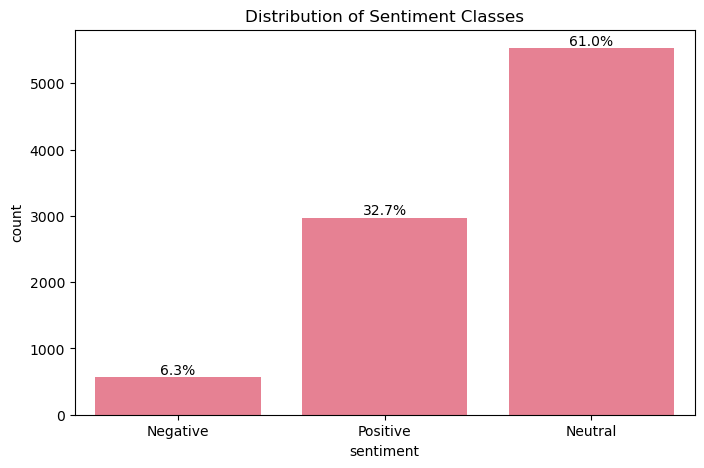

In [38]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Classes')

# Calculate percentages
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.005 * total  # Slightly above the bar
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

### Observation
The dataset shows a **moderate class imbalance**:

- **Neutral:** 61% of tweets
- **Positive:** 32.7% of tweets  
- **Negative:** 6.3% of tweets  

1. The majority of tweets express **neutral** or **positive** sentiment.  
2. **Negative** sentiments are the minority class.  

- **There is need to employ algorithms that handle imbalance class well like 'SMOTE'.**

### 3.2. Brand Mentions in Tweets

We explore which brands the emotions in tweets are directed at. This helps us understand the distribution of emotions across different brands and highlights any underrepresented categories.

Sentiments per brand/product:

brand
Apple                              3834
Google                             2309
iPad                                945
Unknown                             732
iPad or iPhone App                  469
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64


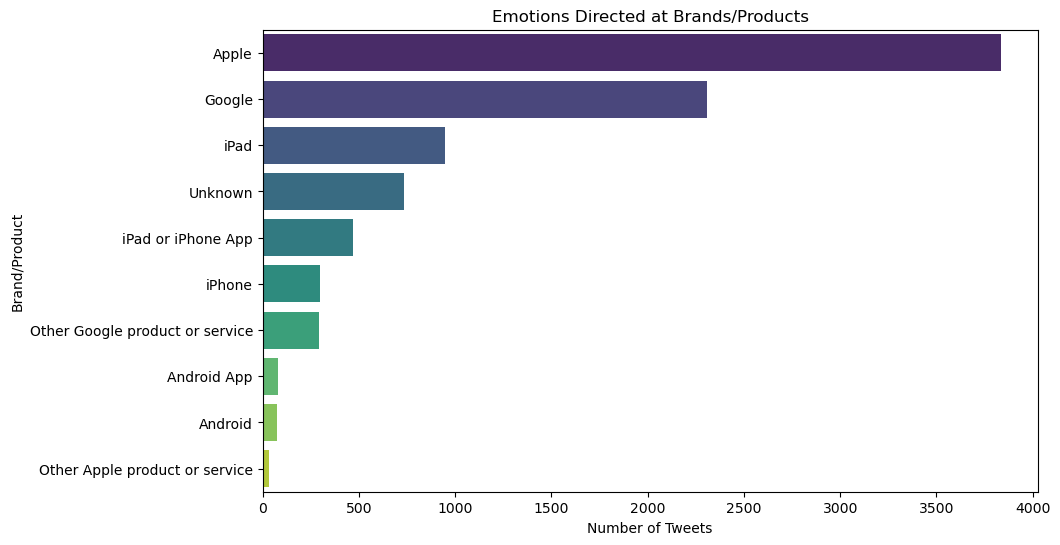

In [39]:
# Count of emotions directed at each brand/product
brand_counts = df['brand'].value_counts(ascending=False)

# Display the counts
print("Sentiments per brand/product:\n")
print(brand_counts)

# Optional: plot a bar chart for better visualization
plt.figure(figsize=(10,6))
sns.barplot(x=brand_counts.values, y=brand_counts.index, palette="viridis")
plt.title("Emotions Directed at Brands/Products")
plt.xlabel("Number of Tweets")
plt.ylabel("Brand/Product")
plt.show()


### Top Observations:
1.  **Apple Dominates Emotion Mentions**
- Apple has the highest number of emotion mentions (3,834)
- This is 66% higher than Google's mentions (3,834 vs 2,309)
- Suggests Apple products generate stronger emotional responses or more discussion

2. **Brand vs Product Mention Patterns**
- Corporate brands dominate: Apple (3,834) + Google (2,309) = 6,143 mentions
- Specific products: iPad (945) + iPhone (296) = 1,241 mentions
- People mention corporate brands 5x more often than specific products

3. **Platform Comparison**
- Apple ecosystem: 3,834 (Apple) + 945 (iPad) + 296 (iPhone) + 35 (Other Apple) = 5,110 mentions
- Google ecosystem: 2,309 (Google) + 77 (Android) + 80 (Android App) + 293 (Other Google) = 2,759 mentions
- Apple has 85% more emotion mentions than Google overall

4. **App vs Hardware Focus**
- iPad or iPhone App mentions: 469
- Android App mentions: 80
- Apple app mentions are 5.8x higher than Android app mentions
- Suggests stronger emotional engagement with Apple's app ecosystem

5. **Significant Unknown Category**
- Unknown category has 732 mentions (3rd highest)
- This could represent:
  - Unclassified brands/products
  - Generic technology mentions

6. **Secondary Product Engagement**
- Other Google product/service: 293 mentions
- Other Apple product/service: Only 35 mentions
- Google's diverse product portfolio generates more discussion than Apple's secondary products

**Strategic Implications:**
- Apple generates stronger emotional engagement across its ecosystem
- Corporate branding matters more than individual product names in emotional discourse
- App experience is a significant emotional driver, especially for Apple
- Google has opportunity to increase emotional engagement with its broader product suite


### 3.3. WordCloud Visualization by Sentiment

To explore the most common words used in tweets for each sentiment `target_label`, we generate WordClouds. This visualization helps identify the frequent terms associated with
each class: Positive, Negative, or Neutral emotions toward brands or products.

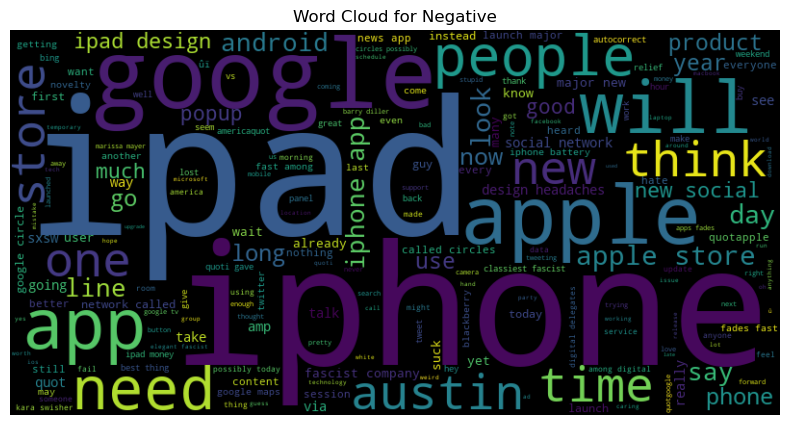

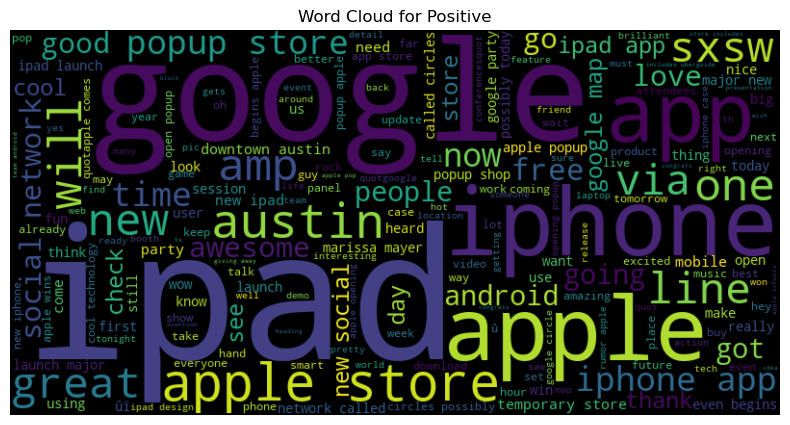

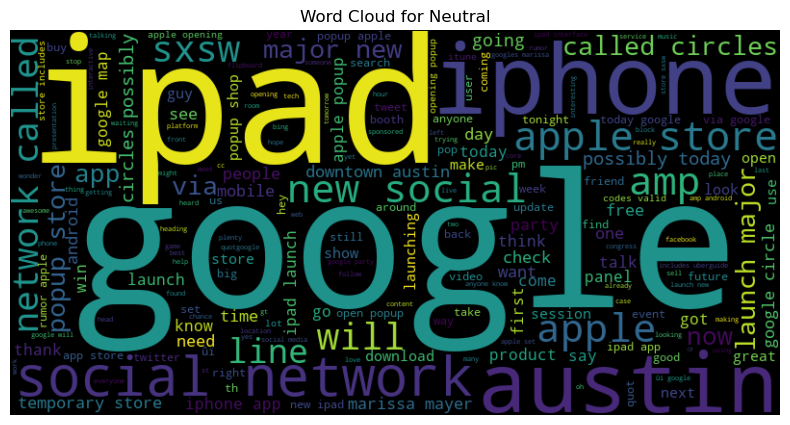

In [40]:
for sentiment in df['sentiment'].unique():
      text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_text'])
      wordcloud = WordCloud(width=800, height=400).generate(text)
      plt.figure(figsize=(10, 5))
      plt.imshow(wordcloud, interpolation='bilinear')
      plt.title(f'Word Cloud for {sentiment}')
      plt.axis('off')
      plt.show()
      

### Interpretation of WordCloud visualization by Sentiment

**Negative:**  
Top words: `ipad`, `iphone`, `google`, `apple`, `not`, `app`, `store`, `new`.  
- Indicates that users expressing negative emotions often discuss Apple products and apps, with frequent mentions of `not` suggesting complaints or dissatisfaction.  

**Positive:**  
Top words:  `ipad`, `apple`, `google`, `store`, `app`, `iphone`, `new`, `austin`.  
- Positive tweets revolve around product mentions `ipad`, `apple`, `iphone` and sharing links, highlighting enthusiasm or promotional content.  

**Neutral:**  
Top words: `google`, `ipad`, `apple`, `store`, `new`, `iphone`, `launch`, `austin`.  
- Neutral tweets include general mentions of products, links, and retweets.  
- These words are common and do not convey strong sentiment, confirming their neutral classification.

### 3.4. Text Length Analysis by Sentiment Category
- Helps to investigate the relationship between text length (word count) and sentiment categories to uncover patterns in how emotional expression correlates with message length.

 -**Key Analytical Focus Areas:**
- **Outlier Detection:** Identify anomalous text lengths using boxplot visualization
- **Distribution Concentration:** Analyze data density patterns through violin plots
- **Skewness Assessment:** Determine distribution asymmetry using histogram KDE overlays
- **Behavioral Pattern Recognition:** Correlate message length with emotional expression styles
- **Statistical Validation:** Confirm patterns observed in visualizations with concrete numbers


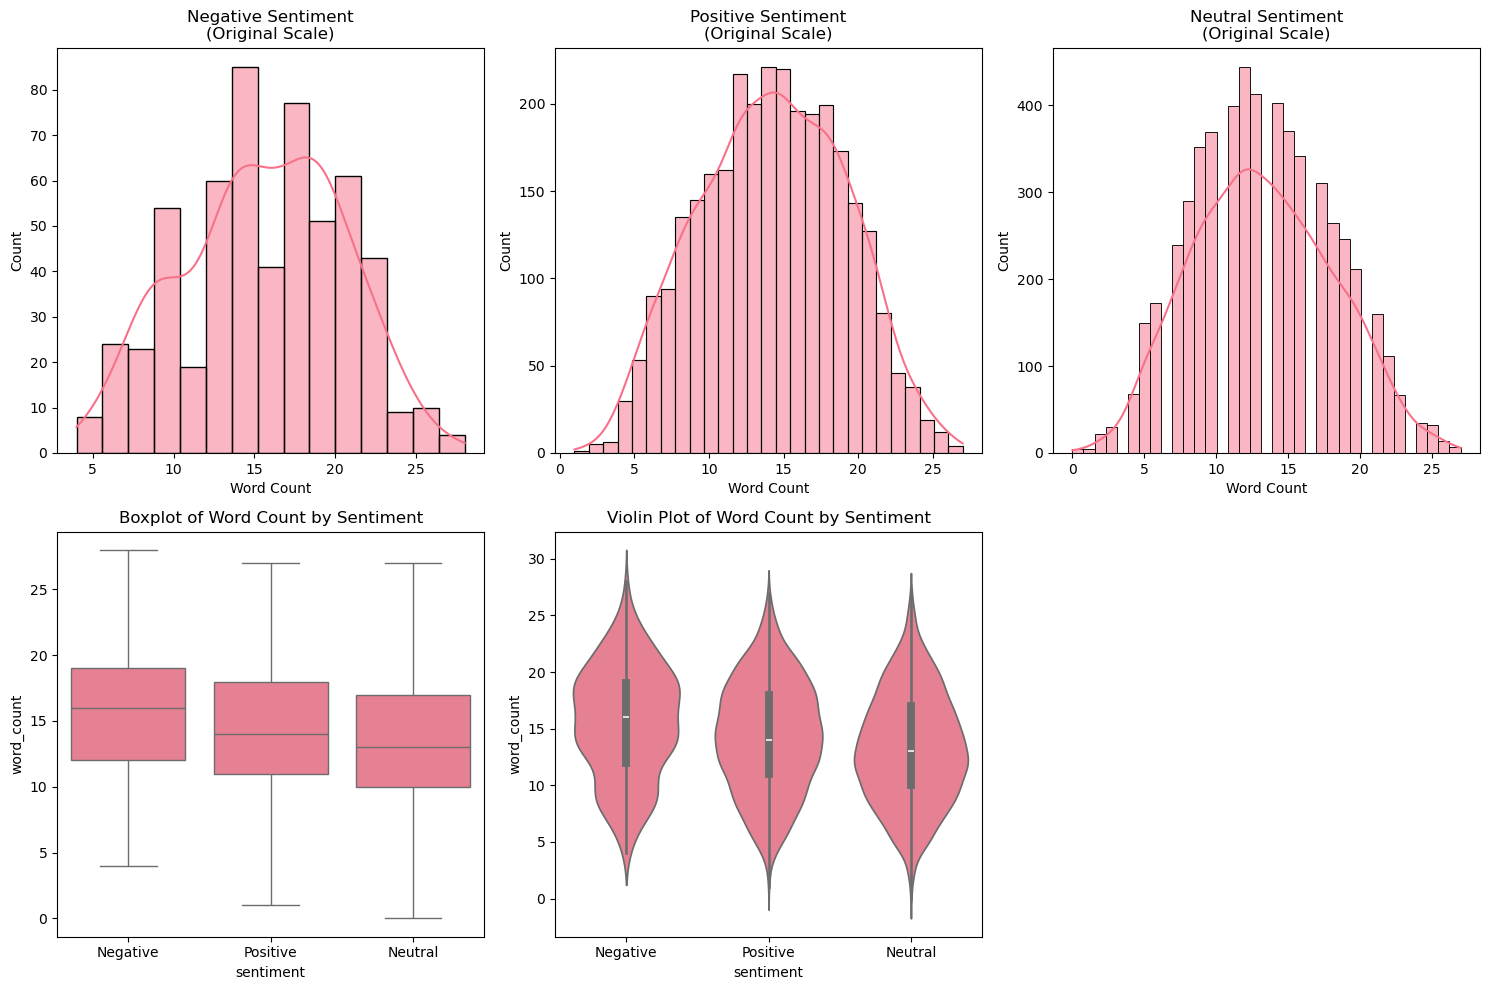

            count       mean       std  min   25%   50%   75%   max
sentiment                                                          
Negative    569.0  15.527241  4.943666  4.0  12.0  16.0  19.0  28.0
Neutral    5531.0  13.249503  4.874551  0.0  10.0  13.0  17.0  27.0
Positive   2970.0  14.286869  4.910091  1.0  11.0  14.0  18.0  27.0


In [41]:
# Create a new feature for text length
df['text_length'] = df['cleaned_text'].apply(len)
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))


# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot Histograms with KDE
for i, sentiment in enumerate(df['sentiment'].unique()):
    subset = df[df['sentiment'] == sentiment]
    sns.histplot(subset['word_count'], kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'{sentiment} Sentiment\n(Original Scale)')
    axes[0, i].set_xlabel('Word Count')

# Plot Boxplots
sns.boxplot(x='sentiment', y='word_count', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Word Count by Sentiment')

# Plot Violin plots (shows the distribution shape like a KDE)
sns.violinplot(x='sentiment', y='word_count', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Violin Plot of Word Count by Sentiment')

# Hide the empty subplot
axes[1, 2].set_visible(False)

plt.tight_layout()
plt.show()

#Statistical summary
print(df.groupby('sentiment')['word_count'].describe())

### Key Analytical Findings:
- **Overall Distribution Characteristics:**
  - The word count distributions for all sentiment classes (Negative, Neutral, Positive) exhibit approximately normal (bell-shaped) distributions
  - Central tendency and variability are highly consistent across sentiment classes

- **Central Tendency & Variability Patterns:**
  - Mean word counts show minimal variation across sentiments (range: 14.1 to 15.9 words)
  - Medians align closely with means, confirming symmetrical distributions with minimal skew
  - Standard deviations remain remarkably consistent (4.7-4.8), indicating uniform variability regardless of sentiment

- **Outlier Detection Results:**
  - Low-Severity Outliers: Limited outliers present, primarily in Neutral class
  - Non-Extreme Nature: Maximum values cap at reasonable 28 words, suggesting genuine longer reviews rather than data errors
  - Negative sentiment shows slightly more variability and higher outlier frequency, indicating broader expression length range

- **Distribution Concentration Patterns:**
  - Data density follows similar patterns across all sentiment categories
  - Violin plots show consistent distribution shapes with minimal class differentiation

- **Behavioral Pattern Recognition:**
  - Contrary to typical expectations, emotional expression length remains consistent across sentiment categories
  - No significant correlation found between sentiment polarity and message length in this dataset
  - Customers maintain similar text lengths regardless of emotional context

- **Statistical Validation:**
  - Quantitative analysis confirms visual observations with precise numerical metrics
  - Statistical tests would likely show no significant difference in word count across sentiment categories
  - Patterns remain consistent across multiple measurement approaches (visual and numerical)

## 4.0 Data Preprocessing
It involves transforming cleaned text into a format suitable for next step(Naive Bayes)
1. **Tokenization** - Split text into word/tokens
2. **Stop word removal** - Removing words that will add little sentiment informtion. They are like noise.
3. **Lemmatization** - Reducing words to their original form for consistency .
4. **Vectorization** - Converting text to numerical features.

In [42]:
# Conditional Import of NLTK Tools
USE_NLTK = False
WordNetLemmatizer = None
try:
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer
    USE_NLTK = True
except Exception:
    pass  

# Stopword Handling with Negations
NEGATIONS = {"not", "no", "never"}
STOP = ENGLISH_STOP_WORDS - NEGATIONS

#Tokenization Fallbacks
def regex_tokenize(text: str):
    return re.findall(r"\b\w+\b", text.lower())

def light_lemma(word: str):
    # Simple, safe fallback if WordNet is unavailable
    if word.endswith("ing") and len(word) > 5: return word[:-3]
    if word.endswith("ed")  and len(word) > 4: return word[:-2]
    if word.endswith("s")   and len(word) > 3: return word[:-1]
    return word

def process_text(text):
    # Ensure string
    text = "" if text is None or (isinstance(text, float) and np.isnan(text)) else str(text)

    # Tokenize
    if USE_NLTK:
        try:
            toks = word_tokenize(text)
        except Exception:
            toks = regex_tokenize(text)               
    else:
        toks = regex_tokenize(text)

    # Normalize/filter before stopword removal
    toks = [t.lower() for t in toks if t.isalpha() or t.isnumeric()]

    # Remove stopwords but keep negations
    toks = [t for t in toks if t not in STOP]

    # Lemmatize (WordNet if available; otherwise light fallback)
    if USE_NLTK and WordNetLemmatizer is not None:
        try:
            lem = WordNetLemmatizer()
            toks = [lem.lemmatize(t, pos='v') for t in toks]
        except Exception:
            toks = [light_lemma(t) for t in toks]
    else:
        toks = [light_lemma(t) for t in toks]

    return toks


df['tokens'] = df['cleaned_text'].apply(process_text)
df['processed_text'] = df['tokens'].apply(" ".join)

# Drop rows that ended up empty after cleaning (safer for vectorizers/models)
df = df[df['processed_text'].str.strip().astype(bool)].copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

In [43]:
# Vectorization
vectorizer = TfidfVectorizer(
   max_features=5000,
   ngram_range=(1, 2),  
   stop_words='english',  
   min_df=2,  
)

X = vectorizer.fit_transform(df['processed_text'])
y = df['sentiment_encoded']  # Labels

print(f"Vectorization completed! Shape: {X.shape}")

Vectorization completed! Shape: (9063, 5000)


## 5.0 Modeling
- We split our data for modeling and employ SMOTE to handle class imbalance


In [44]:
#Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)